# Tratar o campo 'vacina_dataAplicacao" para fazer Gráficos
o objetivo é nos eixos: 
onde, X = data
      Y = dados acumulados do período mês

In [1]:
import requests 
import pandas as pd
import time
from datetime import datetime
import csv

# Importar bibliotecas para construir gráficos:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Leitura do arquivo de Vacinacao completo selecionando alguns
# campos para pesquisa:

test = pd.read_csv("vacinas_2021-04-10-1357.csv", sep=";", 
                 usecols = ['vacina_fabricante_nome',
                            'paciente_idade',
                            'vacina_dataAplicacao',
                            'paciente_endereco_uf',
                            'vacina_descricao_dose'])
                      
                 

# No programa Primeira-Segunda-Doses, temos o resultado
do número de brasileiros que se vacinaram com a 
Primeira_Dose e/ou Segunda_Dose da vacina.

Com o campo "vacina_dataAplicacao", teremos duas informações importantes:
1) Se a pessoa foi totalmente vacinada - com as duas doses;     
2) Como está ocorrendo a vacinação diária e acumulumar esse dado mensal;   
3) Fazendo uma Regresão ML, teremos uma estimativa de quando a população
    brasileira será vacinada

In [2]:
test["vacina_dataAplicacao"].unique()

array(['2021-02-25T00:00:00.000Z', '2021-02-23T00:00:00.000Z',
       '2021-01-27T00:00:00.000Z', ..., '2021-01-25T13:43:20.000Z',
       '2021-02-09T14:00:47.000Z', '2021-02-12T14:10:08.000Z'],
      dtype=object)

In [3]:
# Formato vacina_dataAplicao" = 2021-02-23T00:00:00.000Z;SP;    2ª Dose

# Preparando o campo "vacina_dataAplicacao para o datetime:
# no formato = "%Y/%m/%d"

In [4]:
test['vacina_dataAplicacao'] = pd.to_datetime(test['vacina_dataAplicacao'], 
      format = "%Y-%m-%dT%H:%M:%S")

# Criar uma coluna com Número 1, apenas para contar o total de cada vacina
para ter dados acumulativos

In [5]:
test["counter"] = 1

# Criar um "pivot table" onde:
    linhas = as datas
    colunas = acumulado das vacinas
    

In [6]:
#OBS: ==>  Tirando o campo Columns porque tem muitos fabricantes de vacinas!!

# pivot_test = pd.pivot_table(test, index = 'vacina_dataAplicacao', 
# columns = 'vacina_fabricante_nome', values = 'counter',
#            aggfunc= 'sum', fill_value = 0)
# pivot_test = pivot_test.reset_index()

# print(pivot_test.columns)
#
# vao ser as datas e as colunas vao ser as marcas das vacinas
#
#
#  pivot_test.columns = ['data', 'sinovac', 'inválido', 'covishield', 'jassen', 'phizer']
#

pivot_test = pd.pivot_table(test, 
                            index="vacina_dataAplicacao", 
                            columns = 'vacina_fabricante_nome',
                            values="counter",
                            aggfunc="sum",
                            fill_value=0)
pivot_test = pivot_test.reset_index()



In [7]:
pivot_test.columns


Index(['vacina_dataAplicacao', 'ABBOTT BIOLOGICALS B.V. WEESP - HOLANDA',
       'ASTRA ZENECA /FIOCRUZ', 'ASTRA ZENECA FIO CRUZ', 'ASTRAZENECA',
       'ASTRAZENECA AB', 'ASTRAZENECA FARMACEUTICA DO BRASIL LTDA',
       'ASTRAZENECA FIO CRUZ', 'ASTRAZENECA/FIOCRUZ', 'ASTRAZENECA/OXFORD',
       'ASTRAZENICA', 'ASTRAZENICA/FIOCRUZ', 'AstraZeneca/Fiocruz',
       'AstraZeneca/Oxford', 'BEHRING GMBH', 'BERNA BIOTECH KOREA CORPORATION',
       'BIO-MANGUINHOS', 'BUTANTA', 'BUTANTA/CORANAVAC', 'BUTANTAN',
       'BUTANTAN - FUNDACAO BUTANTAN', 'BioNTech/Fosun Pharma/Pfizer',
       'Butantan', 'Butantan / sinovac', 'Butantan/Sinovac',
       'CINOVAC/CORONAVAC', 'CORONAVAC', 'CORONAVAC/BUTATAN',
       'Coronavac/Butantan', 'Covid-19 - ChAdOx1 nCoV-19',
       'Covid-19 - Coronavac', 'Covid-19 - Covishield',
       'Display of Organization/', 'FIOCRUZ - FUNDACAO OSWALDO CRUZ',
       'FUNDACAO BUTANTAN', 'FUNDACAO OSWALDO CRUZ', 'FUNDAÇÃO BUTANTAN',
       'Fundacao Butantan', 'IMTRAMUSCUL

# Elimimando as datas erradas no Banco de Dados,
# ====>>  Jan/2021 até Abril/2021


In [ ]:
pivot_test = pivot_test.loc[(pivot_test["vacina_dataAplicacao"]>="2021-01-19") &
            (pivot_test["vacina_dataAplicacao"]<"2021-04-01")].reset_index(drop=True)

# Definir a coluna "vacina_fabricante_nome" com valores acumulados
# no Total de Vacinas aplicadas até agora, Abril/2021

Como elemento 0 das colunas é a data, pegar o proóximo elemento,  
começando do elemento 1 ===>  por isso o pivot_test.columns[1:]


In [10]:
# Utilizando o comando .cumsum  ==> retorna a soma acumulada sobre um eixo do DataFrame 

for vacina_fabricante_nome in pivot_test.columns[1:]:
    pivot_test[f"{vacina_fabricante_nome}_acumulado"] = pivot_test[vacina_fabricante_nome].cumsum()
    

# Preparando o Gráfico no formato de "area"
    Eixo X = Período Acumulado entre Jan/21 e Abril/21
    Eixo Y = Os fabricantes das Vacinas

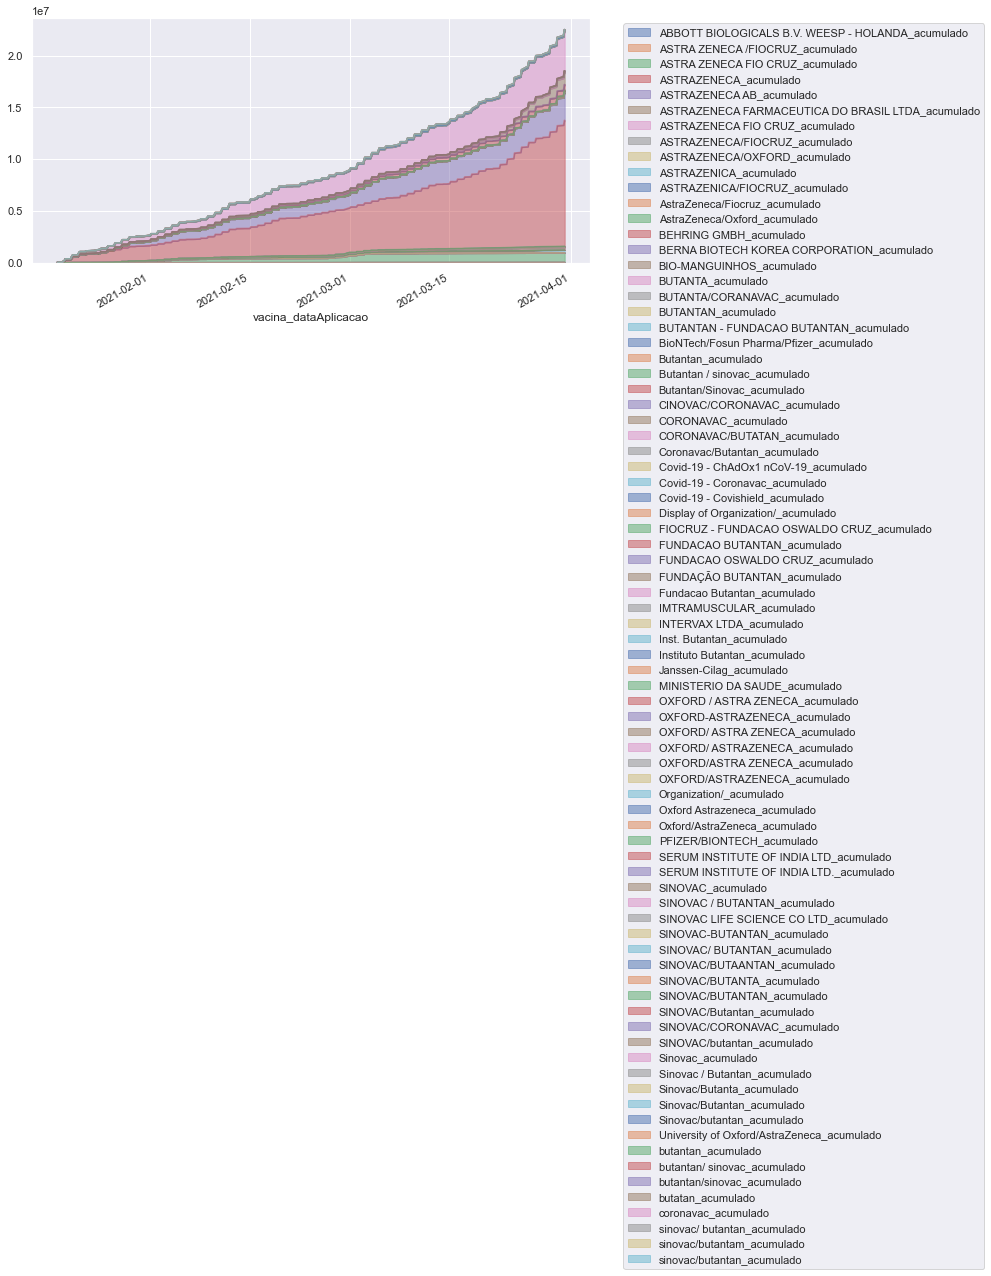

In [12]:

columns_to_plot = [w for w in pivot_test.columns
                  if "acumulado" in w]

# Faço o plot
(pivot_test
 
 .set_index("vacina_dataAplicacao")
 .loc[:,columns_to_plot]
 .plot(kind="area", stacked=True, figsize=(10,5), alpha=.5))

# Somente tirando a legenda para fora do gráfico:

plt.legend(loc="upper left", bbox_to_anchor=(1.05,1))